In [3]:
%matplotlib inline
# import the necessary packages

# import the necessary packages
from __future__ import print_function
from imutils import paths
from scipy.io import loadmat
from skimage import io
import argparse
import dlib
import cv2
import matplotlib.pyplot as plt
import imutils

# 2.2.2: Object detection made easy


[INFO] gathering images and bounding boxes...
[INFO] training detector...
[INFO] dumping classifier to file...
INFO: dumped
data/stop_sign_testing/stop_sign_008.jpg
data/stop_sign_testing/stop_sign_005.jpg
data/stop_sign_testing/stop_sign_004.jpg
data/stop_sign_testing/stop_sign_009.jpg
data/stop_sign_testing/stop_sign_001.jpg
data/stop_sign_testing/stop_sign_006.jpg
data/stop_sign_testing/stop_sign_002.jpg
data/stop_sign_testing/stop_sign_010.jpg
data/stop_sign_testing/stop_sign_011.jpg
data/stop_sign_testing/stop_sign_003.jpg
data/stop_sign_testing/stop_sign_007.jpg


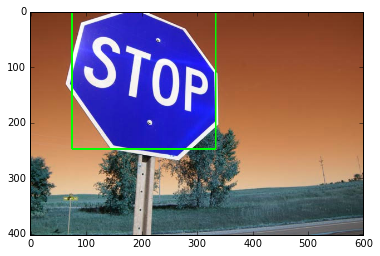

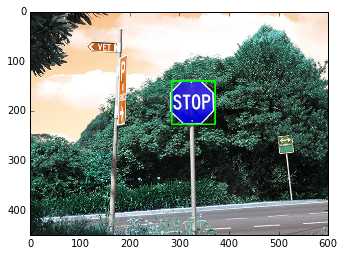

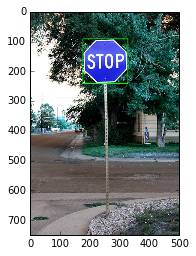

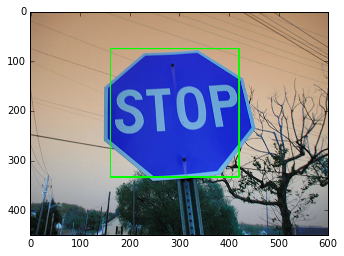

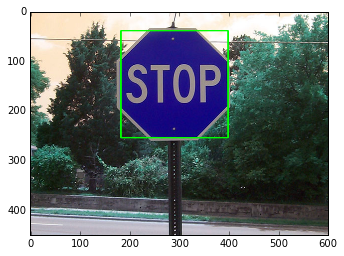

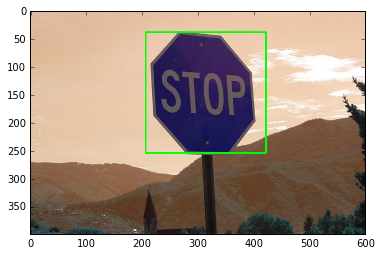

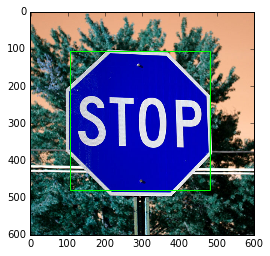

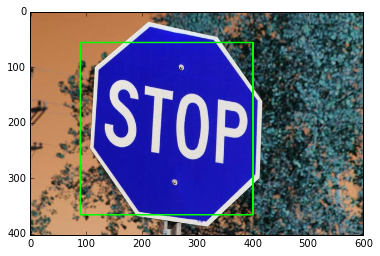

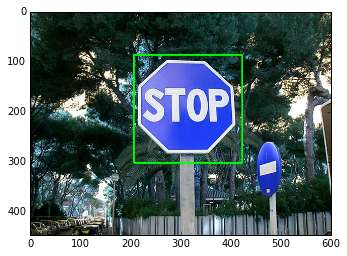

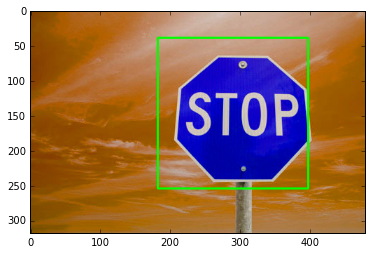

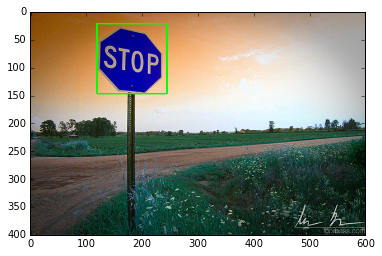

In [4]:
# # construct the argument parse and parse the arguments
# ap = argparse.ArgumentParser()
# ap.add_argument("-c", "--class", required=True,
#     help="Path to the CALTECH-101 class images")
# ap.add_argument("-a", "--annotations", required=True,
#     help="Path to the CALTECH-101 class annotations")
# ap.add_argument("-o", "--output", required=True,
#     help="Path to the output detector")
# args = vars(ap.parse_args())

args = {}
args['class'] = 'data/stop_sign_images/'
args['output'] = 'data/stop_sign_detector_output.svm'
args['annotations'] = 'data/stop_sign_annotations/'


# args['class'] = 'data/sunflowers/sunflower_images/'
# args['output'] = 'data/stop_sign_detector_output.svm'
# args['annotations'] = 'data/sunflowers/sunflower_annotations/'






# grab the default training options for our HOG + Linear SVM detector, then initialize the
# list of images and bounding boxes used to train the classifier
print("[INFO] gathering images and bounding boxes...")
options = dlib.simple_object_detector_training_options()
images = []
boxes = []
 
# loop over the image paths
for imagePath in paths.list_images(args["class"]):
    # extract the image ID from the image path and load the annotations file
    imageID = imagePath[imagePath.rfind("/") + 1:].split("_")[1]
    imageID = imageID.replace(".jpg", "")
    p = "{}/annotation_{}.mat".format(args["annotations"], imageID)
    annotations = loadmat(p)["box_coord"]

    # loop over the annotations and add each annotation to the list of bounding
    # boxes
    bb = [dlib.rectangle(left=long(x), top=long(y), right=long(w), bottom=long(h))
            for (y, h, x, w) in annotations]
    boxes.append(bb)

    # add the image to the list of images
    images.append(io.imread(imagePath))
    
# train the object detector
print("[INFO] training detector...")
detector = dlib.train_simple_object_detector(images, boxes, options)
 
# dump the classifier to file
print("[INFO] dumping classifier to file...")
detector.save(args["output"])
 
# visualize the results of the detector
# win = dlib.image_window()
# win.set_image(detector)
# dlib.hit_enter_to_continue()
print ("INFO: dumped")
detector = dlib.simple_object_detector('data/stop_sign_detector_output.svm')


for testingPath in paths.list_images('data/stop_sign_testing/'):
    print (testingPath)
    # load the image and make predictions
    image = cv2.imread(testingPath)
    boxes = detector(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # loop over the bounding boxes and draw them
    for b in boxes:
        (x, y, w, h) = (b.left(), b.top(), b.right(), b.bottom())
        cv2.rectangle(image, (x, y), (w, h), (0, 255, 0), 2)

    # show the image
    plt.figure()
    plt.imshow(image)
#     cv2.imshow("Image", image)
#     cv2.waitKey(0)

# 2.3.1: Image pyramids
# 2.3.2: Sliding window

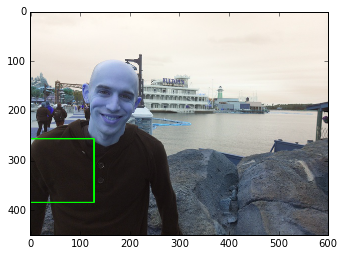

In [50]:
# helper


image = cv2.imread('data/florida_trip.png')

def pyramid(image, scale=1.5, minSize=(30, 30)):
    # yield the original image
    yield image

    # keep looping over the pyramid
    while True:
        # compute the new dimensions of the image and resize it
        w = int(image.shape[1] / scale)
        image = imutils.resize(image, width=w)

        # if the resized image does not meet the supplied minimum
        # size, then stop constructing the pyramid
        if image.shape[0] < minSize[1] or image.shape[1] < minSize[0]:
            break

        # yield the next image in the pyramid
        yield image
        
        
def sliding_window(image, stepSize, windowSize):
    # slide a window across the image
    for y in xrange(0, image.shape[0], stepSize):
        for x in xrange(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])
            

             
def plot_window(window, layer, x, y):
    clone = layer.copy()
    cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
    plt.figure()
    plt.imshow(clone)

            
winW, winH = (128, 128)
stepSize = 128

def pyramid_window():
    for layer in pyramid(image, scale=1.1):
        # loop over the sliding window for each layer of the pyramid
        for (x, y, window) in sliding_window(layer, stepSize=stepSize, windowSize=(winW, winH)):
            # if the current window does not meet our desired window size, ignore it
            if window.shape[0] != winH or window.shape[1] != winW:
                continue
            yield window, layer,x, y
        # THIS IS WHERE WE WOULD PROCESS THE WINDOW, EXTRACT HOG FEATURES, AND
        # APPLY A MACHINE LEARNING CLASSIFIER TO PERFORM OBJECT DETECTION

        # since we do not have a classifier yet, let's just draw the window


        
#         
# pw = pyramid_window()  
window, layer, x, y = pw.next()


plot_window(window, layer, x, y)

# 2.4: The 6-step framework

THEORY.

STEP 1. Getting positive samples ( of objects to find later on )  
STEP 2. Getting negative samples ( some randome pics that dont contain what we want to be looking for)  
STEP 3. TRAIN SVM. on both.  
STEP 4. Hard negative mining: for each scale( image pyramid ) apply sliding window calculate HOG -> record false positives  
STEP 5. Include hard-negative samples and train again ( Positive samples, negative samples, hard-negative samples)   
STEP 6. Apply classifier with sliding windows, its possible that it will find many windows (on scales) and find the object, in order to take the best one use the mean-shift-algorithm  



# 3.4: The bag of (visual) words model


In [5]:
l = "I like studying computer vision You like studying computer vision"
from collections import Counter
Counter(list(l.split(' ')))

Counter({'I': 1,
         'You': 1,
         'computer': 2,
         'like': 2,
         'studying': 2,
         'vision': 2})

# 3.5: Extracting keypoints and local invariant descriptors
3.6: Clustering features to form a codebook  
3.7: Visualizing words in a codebook  
3.8: Vector quantization  
3.8.1: Going from multiple features to a single histogram  
3.8.2: Forming a BOVW  

IN PROJECTS

# 4.5: k-means clustering

https://gurus.pyimagesearch.com/lessons/k-means-clustering/

In [14]:
# import the necessary packages
from sklearn.cluster import KMeans
import numpy as np
import random
import cv2

# initialize the list of color choices
colors = [
# shades of red, green, and blue
    (138, 8, 8), (180, 4, 4), (223, 1, 1), (255, 0, 0), (250, 88, 88),
    (8, 138, 8), (4, 180, 4), (1, 223, 1), (0, 255, 0), (46, 254, 46),
    (11, 11, 97), (8, 8, 138), (4, 4, 180), (0, 0, 255), (46, 46, 254)]

# initialize the canvas
canvas = np.ones((400, 600, 3), dtype="uint8") * 255

# loop over the canvas
for y in xrange(0, 400, 20):
    for x in xrange(0, 600, 20):
        # generate a random (x, y) coordinate, radius, and color for
        # the circle
        (dX, dY) = np.random.randint(5, 10, size=(2,))
        r = np.random.randint(5, 8)
        color = random.choice(colors)[::-1]

    # draw the circle on the canvas
        cv2.circle(canvas, (x + dX, y + dY), r, color, -1)

# pad the border of the image
canvas = cv2.copyMakeBorder(canvas, 5, 5, 5, 5, cv2.BORDER_CONSTANT,
value=(255, 255, 255))

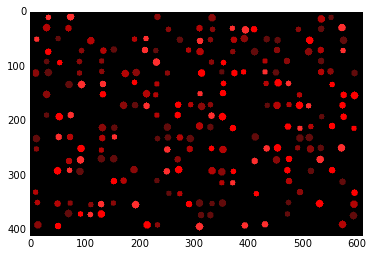

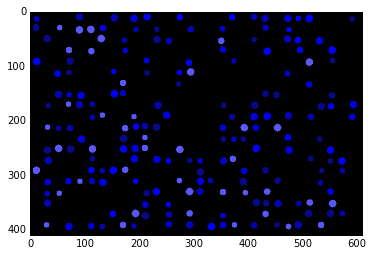

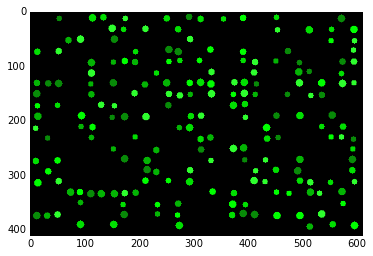

In [5]:
# convert the canvas to grayscale, threshold it, and detect contours
# in the image
gray = cv2.cvtColor(canvas, cv2.COLOR_BGR2GRAY)
gray = cv2.bitwise_not(gray)
thresh = cv2.threshold(gray, 10, 255, cv2.THRESH_BINARY)[1]
(cnts, _) = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
 
# initialize the data matrix
data = []
 
# loop over the contours
for c in cnts:
    # construct a mask from the contour
    mask = np.zeros(canvas.shape[:2], dtype="uint8")
    cv2.drawContours(mask, [c], -1, 255, -1)
    features = cv2.mean(canvas, mask=mask)[:3]
    data.append(features)
    
# cluster the color features
clt = KMeans(n_clusters=3)
clt.fit(data)
cv2.imshow("Canvas", canvas)
 
# loop over the unique cluster identifiers
for i in np.unique(clt.labels_):
    # construct a mask for the current cluster
    mask = np.zeros(canvas.shape[:2], dtype="uint8")

    # loop over the indexes of the current cluster and draw them
    for j in np.where(clt.labels_ == i)[0]:
        cv2.drawContours(mask, [cnts[j]], -1, 255, -1)

    # show the output image for the cluster
#     cv2.imshow("Cluster", cv2.bitwise_and(canvas, canvas, mask=mask))
    plt.figure()
    plt.imshow(cv2.bitwise_and(canvas, canvas, mask=mask))
#     cv2.waitKey(0)

In [49]:
from sklearn.datasets import load_iris
from sklearn.cluster import MiniBatchKMeans
from mlxtend.cluster import Kmeans
from mlxtend.general_plotting import category_scatter, stacked_barplot,enrichment_plot
import pandas as pd
%matplotlib inline

In [37]:
iris = load_iris()

X = iris['data']
y = iris['target']





In [38]:
# mbkm = MiniBatchKMeans(3)
# mbkm.fit(X)


pred = mbkm.predict(X)


d = pd.DataFrame(X)
d['pred'] = pred
d.columns = ['0','1','2','3','pred']



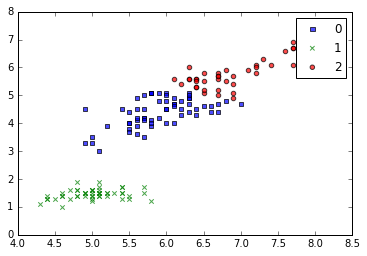

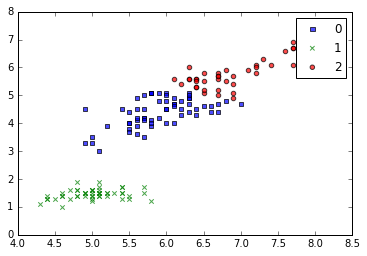

In [40]:
category_scatter('0', '2', 'pred', d)

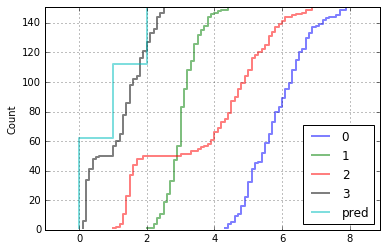

In [46]:
enrichment_plot(d)

In [69]:
km = Kmeans(3, max_iter=100)

In [70]:
km.fit(X)
km.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

# 5.1: What is face recognition?  


# 5.2: LBPs for face recognition

